<a href="https://colab.research.google.com/github/belalhamdy/Adaptive_Huffman/blob/master/FASTAI_STACKOVERFLOW_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Notebook Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install fastai --upgrade

     |████████████████████████████████| 194kB 14.0MB/s 
     |████████████████████████████████| 61kB 10.7MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
! pip install nltk

In [ ]:
from fastai.vision.all import *
from fastai.torch_basics import *
from fastai.data.all import *
from fastai.text.core import *
from fastai.text.data import TextDataLoaders
from fastai.text.learner import language_model_learner
from fastai.text import *
from fastai.text.all import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import os

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from bs4 import BeautifulSoup

import ast

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
os.chdir("/content/drive/Shareddrives/Datasets")
os.chdir("./STACKOVERFLOW_V2")

In [ ]:
tags_delimeter = ';'

#Getting the data to work with

##Downloading the Data

In [ ]:
#os.environ["KAGGLE_USERNAME"] = "belalhamdy"
#os.environ["KAGGLE_KEY"] = "245d5e6f1f2c52ae8a8a680a88097c7e"

In [ ]:
#!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 2.9MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp36-none-any.whl size=73269 sha256=5597a12a59856a14b674874cb79ffc11d91d2243909c88f30d1445ccb51d4c70
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [ ]:
#os.chdir("/content/drive/Shareddrives/Datasets/STACKOVERFLOW_V2")
#os.mkdir("./RAW")
#os.chdir("./RAW")
#os.chdir("/content/drive/Shareddrives/Datasets/STACKOVERFLOW_V2")
#!kaggle datasets download -d stackoverflow/stacksample

 99% 1.10G/1.11G [00:07<00:00, 140MB/s]
100% 1.11G/1.11G [00:07<00:00, 156MB/s]


In [ ]:
#!unzip stacksample.zip && rm stacksample.zip

Archive:  stacksample.zip
  inflating: Answers.csv             
  inflating: Questions.csv           
  inflating: Tags.csv                


##Working with the Data

In [ ]:
#os.chdir("/content/drive/Shareddrives/Datasets/STACKOVERFLOW_V2")
#os.chdir("./RAW")

In the data we have three files:

1.   Questions
2.   Answers
3.   Tags

We need the Questions and Tags only.

So in Questions. We need three columns only: `Id` , `Title` and `Body`
in Tags. We need the both columns which are: `Id` and `Tag`

Then we will make inner join between the two tables on `Id` to have our dataset.
Note: Before joining merge the similar Ids in `Tags` to one cell row with delimeter `;`






In [ ]:
# tags = pd.read_csv("Tags.csv", encoding="ISO-8859-1", dtype={'Tag': str})

In [ ]:
# tags.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [ ]:
# tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750994 entries, 0 to 3750993
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Tag     object
dtypes: int64(1), object(1)
memory usage: 57.2+ MB


In [ ]:
# tags['Tag'] = tags['Tag'].astype(str)
# grouped_tags = tags.groupby("Id")['Tag'].apply(lambda tags: tags_delimeter.join(tags))

In [ ]:
grouped_tags.head()

Id
80                            flex;actionscript-3;air
90       svn;tortoisesvn;branch;branching-and-merging
120                               sql;asp.net;sitemap
180    algorithm;language-agnostic;colors;color-space
260           c#;.net;scripting;compiler-construction
Name: Tag, dtype: object

In [ ]:
# grouped_tags.reset_index()
# grouped_tags = pd.DataFrame({'Id':grouped_tags.index, 'Tags':grouped_tags.values})

In [ ]:
# grouped_tags.head()

,Id,Tags
0,80,flex;actionscript-3;air
1,90,svn;tortoisesvn;branch;branching-and-merging
2,120,sql;asp.net;sitemap
3,180,algorithm;language-agnostic;colors;color-space
4,260,c#;.net;scripting;compiler-construction


In [ ]:
# df = pd.read_csv("Questions.csv", encoding="ISO-8859-1")

In [ ]:
# df.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in one statement,"<p>I've written a database generation script in <a href=""http://en.wikipedia.org/wiki/SQL"">SQL</a> and want to execute it in my <a href=""http://en.wikipedia.org/wiki/Adobe_Integrated_Runtime"">Adobe AIR</a> application:</p>\n\n<pre><code>Create Table tRole (\n roleID integer Primary Key\n ,roleName varchar(40)\n);\nCreate Table tFile (\n fileID integer Primary Key\n ,fileName varchar(50)\n ,fileDescription varchar(500)\n ,thumbnailID integer\n ,fileFormatID integer\n ,categoryID integer\n ,isFavorite boolean\n ,dateAdded date\n ,globalAccessCount integer..."
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for TortoiseSVN?,"<p>Are there any really good tutorials explaining <a href=""http://svnbook.red-bean.com/en/1.8/svn.branchmerge.html"" rel=""nofollow"">branching and merging</a> with Apache Subversion? </p>\n\n<p>All the better if it's specific to TortoiseSVN client.</p>\n"
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,"<p>Has anyone got experience creating <strong>SQL-based ASP.NET</strong> site-map providers?</p>\n\n<p>I've got the default XML file <code>web.sitemap</code> working properly with my Menu and <strong>SiteMapPath</strong> controls, but I'll need a way for the users of my site to create and modify pages dynamically.</p>\n\n<p>I need to tie page viewing permissions into the standard <code>ASP.NET</code> membership system as well.</p>\n"
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,"<p>This is something I've pseudo-solved many times and never quite found a solution. That's stuck with me. The problem is to come up with a way to generate <code>N</code> colors, that are as distinguishable as possible where <code>N</code> is a parameter.</p>\n"
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applications,"<p>I have a little game written in C#. It uses a database as back-end. It's \na <a href=""http://en.wikipedia.org/wiki/Collectible_card_game"">trading card game</a>, and I wanted to implement the function of the cards as a script.</p>\n\n<p>What I mean is that I essentially have an interface, <code>ICard</code>, which a card class implements (<code>public class Card056 : ICard</code>) and which contains function that are called by the game.</p>\n\n<p>Now, to make the thing maintainable/moddable, I would like to have the class for each card as source code in the database and essentially compi..."


In [ ]:
# df.drop(columns=['OwnerUserId', 'CreationDate', 'ClosedDate'], inplace=True)

In [ ]:
# df = df.merge(grouped_tags, on='Id')

In [ ]:
# df.head()

,Id,Score,Title,Body,Tags
0,80,26,SQLStatement.execute() - multiple queries in one statement,"<p>I've written a database generation script in <a href=""http://en.wikipedia.org/wiki/SQL"">SQL</a> and want to execute it in my <a href=""http://en.wikipedia.org/wiki/Adobe_Integrated_Runtime"">Adobe AIR</a> application:</p>\n\n<pre><code>Create Table tRole (\n roleID integer Primary Key\n ,roleName varchar(40)\n);\nCreate Table tFile (\n fileID integer Primary Key\n ,fileName varchar(50)\n ,fileDescription varchar(500)\n ,thumbnailID integer\n ,fileFormatID integer\n ,categoryID integer\n ,isFavorite boolean\n ,dateAdded date\n ,globalAccessCount integer...",flex;actionscript-3;air
1,90,144,Good branching and merging tutorials for TortoiseSVN?,"<p>Are there any really good tutorials explaining <a href=""http://svnbook.red-bean.com/en/1.8/svn.branchmerge.html"" rel=""nofollow"">branching and merging</a> with Apache Subversion? </p>\n\n<p>All the better if it's specific to TortoiseSVN client.</p>\n",svn;tortoisesvn;branch;branching-and-merging
2,120,21,ASP.NET Site Maps,"<p>Has anyone got experience creating <strong>SQL-based ASP.NET</strong> site-map providers?</p>\n\n<p>I've got the default XML file <code>web.sitemap</code> working properly with my Menu and <strong>SiteMapPath</strong> controls, but I'll need a way for the users of my site to create and modify pages dynamically.</p>\n\n<p>I need to tie page viewing permissions into the standard <code>ASP.NET</code> membership system as well.</p>\n",sql;asp.net;sitemap
3,180,53,Function for creating color wheels,"<p>This is something I've pseudo-solved many times and never quite found a solution. That's stuck with me. The problem is to come up with a way to generate <code>N</code> colors, that are as distinguishable as possible where <code>N</code> is a parameter.</p>\n",algorithm;language-agnostic;colors;color-space
4,260,49,Adding scripting functionality to .NET applications,"<p>I have a little game written in C#. It uses a database as back-end. It's \na <a href=""http://en.wikipedia.org/wiki/Collectible_card_game"">trading card game</a>, and I wanted to implement the function of the cards as a script.</p>\n\n<p>What I mean is that I essentially have an interface, <code>ICard</code>, which a card class implements (<code>public class Card056 : ICard</code>) and which contains function that are called by the game.</p>\n\n<p>Now, to make the thing maintainable/moddable, I would like to have the class for each card as source code in the database and essentially compi...",c#;.net;scripting;compiler-construction


In [ ]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1264216 entries, 0 to 1264215
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Id      1264216 non-null  int64 
 1   Score   1264216 non-null  int64 
 2   Title   1264216 non-null  object
 3   Body    1264216 non-null  object
 4   Tags    1264216 non-null  object
dtypes: int64(2), object(3)
memory usage: 57.9+ MB


In [ ]:
# df = df[df['Score']>5]

In [ ]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72950 entries, 0 to 1264205
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      72950 non-null  int64 
 1   Score   72950 non-null  int64 
 2   Title   72950 non-null  object
 3   Body    72950 non-null  object
 4   Tags    72950 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.3+ MB


In [ ]:
# os.chdir("/content/drive/Shareddrives/Datasets/STACKOVERFLOW_V2")

In [ ]:
# df.to_csv('Data.csv')

#Loading the Data

##Filtering the data to `most_common_number` tags (60)

In [ ]:
os.chdir("/content/drive/Shareddrives/Datasets/STACKOVERFLOW_V2")

In [ ]:
df = pd.read_csv("Data.csv", encoding="ISO-8859-1",index_col=0)

In [ ]:
df.head()

,Id,Score,Title,Body,Tags
0,80,26,SQLStatement.execute() - multiple queries in one statement,"<p>I've written a database generation script in <a href=""http://en.wikipedia.org/wiki/SQL"">SQL</a> and want to execute it in my <a href=""http://en.wikipedia.org/wiki/Adobe_Integrated_Runtime"">Adobe AIR</a> application:</p>\n\n<pre><code>Create Table tRole (\n roleID integer Primary Key\n ,roleName varchar(40)\n);\nCreate Table tFile (\n fileID integer Primary Key\n ,fileName varchar(50)\n ,fileDescription varchar(500)\n ,thumbnailID integer\n ,fileFormatID integer\n ,categoryID integer\n ,isFavorite boolean\n ,dateAdded date\n ,globalAccessCount integer...",flex;actionscript-3;air
1,90,144,Good branching and merging tutorials for TortoiseSVN?,"<p>Are there any really good tutorials explaining <a href=""http://svnbook.red-bean.com/en/1.8/svn.branchmerge.html"" rel=""nofollow"">branching and merging</a> with Apache Subversion? </p>\n\n<p>All the better if it's specific to TortoiseSVN client.</p>\n",svn;tortoisesvn;branch;branching-and-merging
2,120,21,ASP.NET Site Maps,"<p>Has anyone got experience creating <strong>SQL-based ASP.NET</strong> site-map providers?</p>\n\n<p>I've got the default XML file <code>web.sitemap</code> working properly with my Menu and <strong>SiteMapPath</strong> controls, but I'll need a way for the users of my site to create and modify pages dynamically.</p>\n\n<p>I need to tie page viewing permissions into the standard <code>ASP.NET</code> membership system as well.</p>\n",sql;asp.net;sitemap
3,180,53,Function for creating color wheels,"<p>This is something I've pseudo-solved many times and never quite found a solution. That's stuck with me. The problem is to come up with a way to generate <code>N</code> colors, that are as distinguishable as possible where <code>N</code> is a parameter.</p>\n",algorithm;language-agnostic;colors;color-space
4,260,49,Adding scripting functionality to .NET applications,"<p>I have a little game written in C#. It uses a database as back-end. It's \na <a href=""http://en.wikipedia.org/wiki/Collectible_card_game"">trading card game</a>, and I wanted to implement the function of the cards as a script.</p>\n\n<p>What I mean is that I essentially have an interface, <code>ICard</code>, which a card class implements (<code>public class Card056 : ICard</code>) and which contains function that are called by the game.</p>\n\n<p>Now, to make the thing maintainable/moddable, I would like to have the class for each card as source code in the database and essentially compi...",c#;.net;scripting;compiler-construction


In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.drop(columns=['Id', 'Score'], inplace=True)

In [ ]:
df.head()

,Title,Body,Tags
0,SQLStatement.execute() - multiple queries in one statement,"<p>I've written a database generation script in <a href=""http://en.wikipedia.org/wiki/SQL"">SQL</a> and want to execute it in my <a href=""http://en.wikipedia.org/wiki/Adobe_Integrated_Runtime"">Adobe AIR</a> application:</p>\n\n<pre><code>Create Table tRole (\n roleID integer Primary Key\n ,roleName varchar(40)\n);\nCreate Table tFile (\n fileID integer Primary Key\n ,fileName varchar(50)\n ,fileDescription varchar(500)\n ,thumbnailID integer\n ,fileFormatID integer\n ,categoryID integer\n ,isFavorite boolean\n ,dateAdded date\n ,globalAccessCount integer...",flex;actionscript-3;air
1,Good branching and merging tutorials for TortoiseSVN?,"<p>Are there any really good tutorials explaining <a href=""http://svnbook.red-bean.com/en/1.8/svn.branchmerge.html"" rel=""nofollow"">branching and merging</a> with Apache Subversion? </p>\n\n<p>All the better if it's specific to TortoiseSVN client.</p>\n",svn;tortoisesvn;branch;branching-and-merging
2,ASP.NET Site Maps,"<p>Has anyone got experience creating <strong>SQL-based ASP.NET</strong> site-map providers?</p>\n\n<p>I've got the default XML file <code>web.sitemap</code> working properly with my Menu and <strong>SiteMapPath</strong> controls, but I'll need a way for the users of my site to create and modify pages dynamically.</p>\n\n<p>I need to tie page viewing permissions into the standard <code>ASP.NET</code> membership system as well.</p>\n",sql;asp.net;sitemap
3,Function for creating color wheels,"<p>This is something I've pseudo-solved many times and never quite found a solution. That's stuck with me. The problem is to come up with a way to generate <code>N</code> colors, that are as distinguishable as possible where <code>N</code> is a parameter.</p>\n",algorithm;language-agnostic;colors;color-space
4,Adding scripting functionality to .NET applications,"<p>I have a little game written in C#. It uses a database as back-end. It's \na <a href=""http://en.wikipedia.org/wiki/Collectible_card_game"">trading card game</a>, and I wanted to implement the function of the cards as a script.</p>\n\n<p>What I mean is that I essentially have an interface, <code>ICard</code>, which a card class implements (<code>public class Card056 : ICard</code>) and which contains function that are called by the game.</p>\n\n<p>Now, to make the thing maintainable/moddable, I would like to have the class for each card as source code in the database and essentially compi...",c#;.net;scripting;compiler-construction


In [ ]:
df['Tags'] = df['Tags'].apply(lambda x: x.split(tags_delimeter))

In [ ]:
df.head()

,Title,Body,Tags
0,SQLStatement.execute() - multiple queries in one statement,"<p>I've written a database generation script in <a href=""http://en.wikipedia.org/wiki/SQL"">SQL</a> and want to execute it in my <a href=""http://en.wikipedia.org/wiki/Adobe_Integrated_Runtime"">Adobe AIR</a> application:</p>\n\n<pre><code>Create Table tRole (\n roleID integer Primary Key\n ,roleName varchar(40)\n);\nCreate Table tFile (\n fileID integer Primary Key\n ,fileName varchar(50)\n ,fileDescription varchar(500)\n ,thumbnailID integer\n ,fileFormatID integer\n ,categoryID integer\n ,isFavorite boolean\n ,dateAdded date\n ,globalAccessCount integer...","[flex, actionscript-3, air]"
1,Good branching and merging tutorials for TortoiseSVN?,"<p>Are there any really good tutorials explaining <a href=""http://svnbook.red-bean.com/en/1.8/svn.branchmerge.html"" rel=""nofollow"">branching and merging</a> with Apache Subversion? </p>\n\n<p>All the better if it's specific to TortoiseSVN client.</p>\n","[svn, tortoisesvn, branch, branching-and-merging]"
2,ASP.NET Site Maps,"<p>Has anyone got experience creating <strong>SQL-based ASP.NET</strong> site-map providers?</p>\n\n<p>I've got the default XML file <code>web.sitemap</code> working properly with my Menu and <strong>SiteMapPath</strong> controls, but I'll need a way for the users of my site to create and modify pages dynamically.</p>\n\n<p>I need to tie page viewing permissions into the standard <code>ASP.NET</code> membership system as well.</p>\n","[sql, asp.net, sitemap]"
3,Function for creating color wheels,"<p>This is something I've pseudo-solved many times and never quite found a solution. That's stuck with me. The problem is to come up with a way to generate <code>N</code> colors, that are as distinguishable as possible where <code>N</code> is a parameter.</p>\n","[algorithm, language-agnostic, colors, color-space]"
4,Adding scripting functionality to .NET applications,"<p>I have a little game written in C#. It uses a database as back-end. It's \na <a href=""http://en.wikipedia.org/wiki/Collectible_card_game"">trading card game</a>, and I wanted to implement the function of the cards as a script.</p>\n\n<p>What I mean is that I essentially have an interface, <code>ICard</code>, which a card class implements (<code>public class Card056 : ICard</code>) and which contains function that are called by the game.</p>\n\n<p>Now, to make the thing maintainable/moddable, I would like to have the class for each card as source code in the database and essentially compi...","[c#, .net, scripting, compiler-construction]"


In [ ]:
tags = [item for sublist in df['Tags'].values for item in sublist]

In [ ]:
len(tags)

224129

In [ ]:
tags_set = set(tags)
unique_tags = list(tags_set)
len(unique_tags)

14883

In [ ]:
most_common_number = 60
flat_list = [item for sublist in df['Tags'].values for item in sublist]

keywords = nltk.FreqDist(flat_list)

keywords = nltk.FreqDist(keywords)

frequencies_words = keywords.most_common(most_common_number)
tags_features = [word[0] for word in frequencies_words]

In [ ]:
tags_features

['c#',
 'java',
 'javascript',
 'android',
 'python',
 'c++',
 'php',
 'jquery',
 '.net',
 'ios',
 'html',
 'css',
 'c',
 'iphone',
 'objective-c',
 'ruby-on-rails',
 'sql',
 'asp.net',
 'mysql',
 'ruby',
 'r',
 'git',
 'asp.net-mvc',
 'linux',
 'sql-server',
 'node.js',
 'angularjs',
 'django',
 'performance',
 'algorithm',
 'string',
 'xcode',
 'arrays',
 'wpf',
 'eclipse',
 'haskell',
 'windows',
 'scala',
 'multithreading',
 'json',
 'c++11',
 'regex',
 'visual-studio',
 'html5',
 'osx',
 'swift',
 'database',
 'unit-testing',
 'spring',
 'xml',
 'bash',
 'ajax',
 'delphi',
 'cocoa-touch',
 'ruby-on-rails-3',
 'visual-studio-2010',
 'linq',
 'debugging',
 'generics',
 'perl']

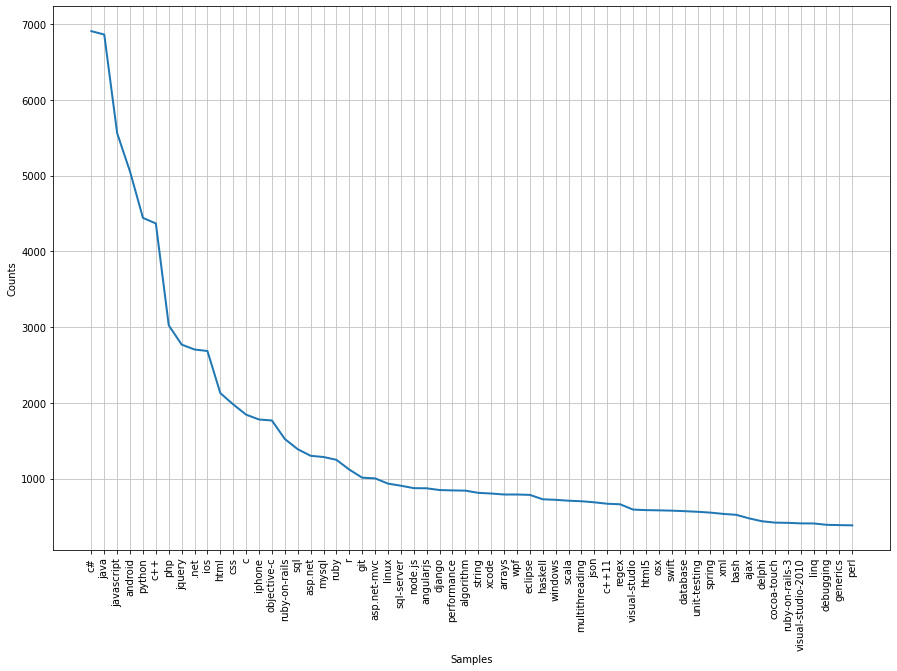

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
keywords.plot(most_common_number, cumulative=False)

In [ ]:
def most_common(tags,tags_to_filter_on):
    tags_filtered = []
    for i in range(0, len(tags)):
        if tags[i] in tags_to_filter_on:
            tags_filtered.append(tags[i])
    return tags_filtered

In [ ]:
df['Tags'] = df['Tags'].apply(lambda x: most_common(x,tags_features))
df['Tags'] = df['Tags'].apply(lambda x: x if len(x)>0 else None)

In [ ]:
df.shape

(72950, 3)

In [ ]:
df.dropna(subset=['Tags'], inplace=True)

In [ ]:
df.shape

(60227, 3)

In [ ]:
df = df.reset_index()

In [ ]:
df.head()

,index,Title,Body,Tags
0,2,ASP.NET Site Maps,"<p>Has anyone got experience creating <strong>SQL-based ASP.NET</strong> site-map providers?</p>\n\n<p>I've got the default XML file <code>web.sitemap</code> working properly with my Menu and <strong>SiteMapPath</strong> controls, but I'll need a way for the users of my site to create and modify pages dynamically.</p>\n\n<p>I need to tie page viewing permissions into the standard <code>ASP.NET</code> membership system as well.</p>\n","[sql, asp.net]"
1,3,Function for creating color wheels,"<p>This is something I've pseudo-solved many times and never quite found a solution. That's stuck with me. The problem is to come up with a way to generate <code>N</code> colors, that are as distinguishable as possible where <code>N</code> is a parameter.</p>\n",[algorithm]
2,4,Adding scripting functionality to .NET applications,"<p>I have a little game written in C#. It uses a database as back-end. It's \na <a href=""http://en.wikipedia.org/wiki/Collectible_card_game"">trading card game</a>, and I wanted to implement the function of the cards as a script.</p>\n\n<p>What I mean is that I essentially have an interface, <code>ICard</code>, which a card class implements (<code>public class Card056 : ICard</code>) and which contains function that are called by the game.</p>\n\n<p>Now, to make the thing maintainable/moddable, I would like to have the class for each card as source code in the database and essentially compi...","[c#, .net]"
3,5,Should I use nested classes in this case?,"<p>I am working on a collection of classes used for video playback and recording. I have one main class which acts like the public interface, with methods like <code>play()</code>, <code>stop()</code>, <code>pause()</code>, <code>record()</code> etc... Then I have workhorse classes which do the video decoding and video encoding. </p>\n\n<p>I just learned about the existence of nested classes in C++, and I'm curious to know what programmers think about using them. I am a little wary and not really sure what the benefits/drawbacks are, but they seem (according to the book I'm reading) to be ...",[c++]
4,6,Homegrown consumption of web services,"<p>I've been writing a few web services for a .net app, now I'm ready to consume them. I've seen numerous examples where there is homegrown code for consuming the service as opposed to using the auto generated methods Visual Studio creates when adding the web reference. </p>\n\n<p>Is there some advantage to this?</p>\n",[.net]


In [ ]:
df.to_csv('Filtered_Data.csv')

## Cleaning the data

Cleaning the data by:

* Removing html format
* Lowering text
* Transforming abbreviations
* Removing punctuation (but keeping words like c# since it's the most popular tag)
* Lemmatizing words
* Removing stop words

In [ ]:
os.chdir("/content/drive/Shareddrives/Datasets/STACKOVERFLOW_V2")

In [ ]:
df = pd.read_csv("Filtered_Data.csv", encoding="ISO-8859-1",index_col=0)

In [ ]:
df.head()

,index,Title,Body,Tags
0,2,ASP.NET Site Maps,"<p>Has anyone got experience creating <strong>SQL-based ASP.NET</strong> site-map providers?</p>\n\n<p>I've got the default XML file <code>web.sitemap</code> working properly with my Menu and <strong>SiteMapPath</strong> controls, but I'll need a way for the users of my site to create and modify pages dynamically.</p>\n\n<p>I need to tie page viewing permissions into the standard <code>ASP.NET</code> membership system as well.</p>\n","['sql', 'asp.net']"
1,3,Function for creating color wheels,"<p>This is something I've pseudo-solved many times and never quite found a solution. That's stuck with me. The problem is to come up with a way to generate <code>N</code> colors, that are as distinguishable as possible where <code>N</code> is a parameter.</p>\n",['algorithm']
2,4,Adding scripting functionality to .NET applications,"<p>I have a little game written in C#. It uses a database as back-end. It's \na <a href=""http://en.wikipedia.org/wiki/Collectible_card_game"">trading card game</a>, and I wanted to implement the function of the cards as a script.</p>\n\n<p>What I mean is that I essentially have an interface, <code>ICard</code>, which a card class implements (<code>public class Card056 : ICard</code>) and which contains function that are called by the game.</p>\n\n<p>Now, to make the thing maintainable/moddable, I would like to have the class for each card as source code in the database and essentially compi...","['c#', '.net']"
3,5,Should I use nested classes in this case?,"<p>I am working on a collection of classes used for video playback and recording. I have one main class which acts like the public interface, with methods like <code>play()</code>, <code>stop()</code>, <code>pause()</code>, <code>record()</code> etc... Then I have workhorse classes which do the video decoding and video encoding. </p>\n\n<p>I just learned about the existence of nested classes in C++, and I'm curious to know what programmers think about using them. I am a little wary and not really sure what the benefits/drawbacks are, but they seem (according to the book I'm reading) to be ...",['c++']
4,6,Homegrown consumption of web services,"<p>I've been writing a few web services for a .net app, now I'm ready to consume them. I've seen numerous examples where there is homegrown code for consuming the service as opposed to using the auto generated methods Visual Studio creates when adding the web reference. </p>\n\n<p>Is there some advantage to this?</p>\n",['.net']


In [ ]:
df['Body'] = df['Body'].apply(lambda x: BeautifulSoup(x).get_text()) 

In [ ]:
df.head()

,index,Title,Body,Tags
0,2,ASP.NET Site Maps,"Has anyone got experience creating SQL-based ASP.NET site-map providers?\nI've got the default XML file web.sitemap working properly with my Menu and SiteMapPath controls, but I'll need a way for the users of my site to create and modify pages dynamically.\nI need to tie page viewing permissions into the standard ASP.NET membership system as well.\n","['sql', 'asp.net']"
1,3,Function for creating color wheels,"This is something I've pseudo-solved many times and never quite found a solution. That's stuck with me. The problem is to come up with a way to generate N colors, that are as distinguishable as possible where N is a parameter.\n",['algorithm']
2,4,Adding scripting functionality to .NET applications,"I have a little game written in C#. It uses a database as back-end. It's \na trading card game, and I wanted to implement the function of the cards as a script.\nWhat I mean is that I essentially have an interface, ICard, which a card class implements (public class Card056 : ICard) and which contains function that are called by the game.\nNow, to make the thing maintainable/moddable, I would like to have the class for each card as source code in the database and essentially compile it on first use. So when I have to add/change a card, I'll just add it to the database and tell my applicatio...","['c#', '.net']"
3,5,Should I use nested classes in this case?,"I am working on a collection of classes used for video playback and recording. I have one main class which acts like the public interface, with methods like play(), stop(), pause(), record() etc... Then I have workhorse classes which do the video decoding and video encoding. \nI just learned about the existence of nested classes in C++, and I'm curious to know what programmers think about using them. I am a little wary and not really sure what the benefits/drawbacks are, but they seem (according to the book I'm reading) to be used in cases such as mine.\nThe book suggests that in a scenari...",['c++']
4,6,Homegrown consumption of web services,"I've been writing a few web services for a .net app, now I'm ready to consume them. I've seen numerous examples where there is homegrown code for consuming the service as opposed to using the auto generated methods Visual Studio creates when adding the web reference. \nIs there some advantage to this?\n",['.net']


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub(r"\'\n", " ", text)
    text = re.sub(r"\'\xa0", " ", text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [ ]:
df['Body'] = df['Body'].apply(lambda x: clean_text(x)) 

In [ ]:
df.head()

,index,Title,Body,Tags
0,2,ASP.NET Site Maps,"has anyone got experience creating sql-based asp.net site-map providers? i have got the default xml file web.sitemap working properly with my menu and sitemappath controls, but i will need a way for the users of my site to create and modify pages dynamically. i need to tie page viewing permissions into the standard asp.net membership system as well.","['sql', 'asp.net']"
1,3,Function for creating color wheels,"this is something i have pseudo-solved many times and never quite found a solution. that stuck with me. the problem is to come up with a way to generate n colors, that are as distinguishable as possible where n is a parameter.",['algorithm']
2,4,Adding scripting functionality to .NET applications,"i have a little game written in c#. it uses a database as back-end. it a trading card game, and i wanted to implement the function of the cards as a script. what i mean is that i essentially have an interface, icard, which a card class implements (public class card056 : icard) and which contains function that are called by the game. now, to make the thing maintainable/moddable, i would like to have the class for each card as source code in the database and essentially compile it on first use. so when i have to add/change a card, i will just add it to the database and tell my application to...","['c#', '.net']"
3,5,Should I use nested classes in this case?,"i am working on a collection of classes used for video playback and recording. i have one main class which acts like the public interface, with methods like play(), stop(), pause(), record() etc... then i have workhorse classes which do the video decoding and video encoding. i just learned about the existence of nested classes in c++, and i am curious to know what programmers think about using them. i am a little wary and not really sure what the benefits/drawbacks are, but they seem (according to the book i am reading) to be used in cases such as mine. the book suggests that in a scenario...",['c++']
4,6,Homegrown consumption of web services,"i have been writing a few web services for a .net app, now i am ready to consume them. i have seen numerous examples where there is homegrown code for consuming the service as opposed to using the auto generated methods visual studio creates when adding the web reference. is there some advantage to this?",['.net']


In [ ]:
token=ToktokTokenizer()

In [ ]:
def strip_list_noempty(mylist):
    newlist = (item.strip() if hasattr(item, 'strip') else item for item in mylist)
    return [item for item in newlist if item != '']

In [ ]:
def clean_punct(text):
    punct = '!"$%&\'()*+,./:;<=>?@[\\]^_`{|}~'
    words=token.tokenize(text)
    punctuation_filtered = []
    regex = re.compile('[%s]' % re.escape(punct))
    remove_punctuation = str.maketrans(' ', ' ', punct)
    for w in words:
        if w in tags_features:
            punctuation_filtered.append(w)
        else:
            punctuation_filtered.append(regex.sub('', w))
  
    filtered_list = strip_list_noempty(punctuation_filtered)
        
    return ' '.join(map(str, filtered_list))

In [ ]:
df['Body'] = df['Body'].apply(lambda x: clean_punct(x)) 

In [ ]:
df.head()

,index,Title,Body,Tags
0,2,ASP.NET Site Maps,has anyone got experience creating sql-based asp.net site-map providers i have got the default xml file websitemap working properly with my menu and sitemappath controls but i will need a way for the users of my site to create and modify pages dynamically i need to tie page viewing permissions into the standard asp.net membership system as well,"['sql', 'asp.net']"
1,3,Function for creating color wheels,this is something i have pseudo-solved many times and never quite found a solution that stuck with me the problem is to come up with a way to generate n colors that are as distinguishable as possible where n is a parameter,['algorithm']
2,4,Adding scripting functionality to .NET applications,i have a little game written in c# it uses a database as back-end it a trading card game and i wanted to implement the function of the cards as a script what i mean is that i essentially have an interface icard which a card class implements public class card056 icard and which contains function that are called by the game now to make the thing maintainablemoddable i would like to have the class for each card as source code in the database and essentially compile it on first use so when i have to addchange a card i will just add it to the database and tell my application to refresh without ...,"['c#', '.net']"
3,5,Should I use nested classes in this case?,i am working on a collection of classes used for video playback and recording i have one main class which acts like the public interface with methods like play stop pause record etc then i have workhorse classes which do the video decoding and video encoding i just learned about the existence of nested classes in c++ and i am curious to know what programmers think about using them i am a little wary and not really sure what the benefitsdrawbacks are but they seem according to the book i am reading to be used in cases such as mine the book suggests that in a scenario like mine a good soluti...,['c++']
4,6,Homegrown consumption of web services,i have been writing a few web services for a .net app now i am ready to consume them i have seen numerous examples where there is homegrown code for consuming the service as opposed to using the auto generated methods visual studio creates when adding the web reference is there some advantage to this,['.net']


In [ ]:
lemma=WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [ ]:
def lemitizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w, pos="v")
        listLemma.append(x)
    return ' '.join(map(str, listLemma))

In [ ]:
def stopWordsRemove(text):
    stop_words = set(stopwords.words("english"))
    words=token.tokenize(text)
    filtered = [w for w in words if not w in stop_words]
    return ' '.join(map(str, filtered))

In [ ]:
df['Body'] = df['Body'].apply(lambda x: lemitizeWords(x)) 
df['Body'] = df['Body'].apply(lambda x: stopWordsRemove(x)) 

In [ ]:
df.head()

,index,Title,Body,Tags
0,2,ASP.NET Site Maps,anyone get experience create sql-based asp.net site-map providers get default xml file websitemap work properly menu sitemappath control need way users site create modify page dynamically need tie page view permissions standard asp.net membership system well,"['sql', 'asp.net']"
1,3,Function for creating color wheels,something pseudo-solved many time never quite find solution stick problem come way generate n color distinguishable possible n parameter,['algorithm']
2,4,Adding scripting functionality to .NET applications,little game write c# use database back-end trade card game want implement function card script mean essentially interface icard card class implement public class card056 icard contain function call game make thing maintainablemoddable would like class card source code database essentially compile first use addchange card add database tell application refresh without need assembly deployment especially since would talk 1 assembly per card mean hundreds assemblies possible register class source file instantiate etc icard card current new mygamecardlibrarycard056 card current onenterplay ref ...,"['c#', '.net']"
3,5,Should I use nested classes in this case?,work collection class use video playback record one main class act like public interface methods like play stop pause record etc workhorse class video decode video encode learn existence nest class c++ curious know programmers think use little wary really sure benefitsdrawbacks seem accord book read use case mine book suggest scenario like mine good solution would nest workhorse class inside interface class separate file class client mean use avoid possible name conflict know justifications nest class new concept want see programmers think issue,['c++']
4,6,Homegrown consumption of web services,write web service .net app ready consume see numerous examples homegrown code consume service oppose use auto generate methods visual studio create add web reference advantage,['.net']


In [ ]:
df['Title'] = df['Title'].apply(lambda x: str(x))
df['Title'] = df['Title'].apply(lambda x: clean_text(x)) 
df['Title'] = df['Title'].apply(lambda x: clean_punct(x)) 
df['Title'] = df['Title'].apply(lambda x: lemitizeWords(x)) 
df['Title'] = df['Title'].apply(lambda x: stopWordsRemove(x)) 

In [ ]:
df.head()

,index,Title,Body,Tags
0,2,asp.net site map,anyone get experience create sql-based asp.net site-map providers get default xml file websitemap work properly menu sitemappath control need way users site create modify page dynamically need tie page view permissions standard asp.net membership system well,"['sql', 'asp.net']"
1,3,function create color wheel,something pseudo-solved many time never quite find solution stick problem come way generate n color distinguishable possible n parameter,['algorithm']
2,4,add script functionality .net applications,little game write c# use database back-end trade card game want implement function card script mean essentially interface icard card class implement public class card056 icard contain function call game make thing maintainablemoddable would like class card source code database essentially compile first use addchange card add database tell application refresh without need assembly deployment especially since would talk 1 assembly per card mean hundreds assemblies possible register class source file instantiate etc icard card current new mygamecardlibrarycard056 card current onenterplay ref ...,"['c#', '.net']"
3,5,use nest class case,work collection class use video playback record one main class act like public interface methods like play stop pause record etc workhorse class video decode video encode learn existence nest class c++ curious know programmers think use little wary really sure benefitsdrawbacks seem accord book read use case mine book suggest scenario like mine good solution would nest workhorse class inside interface class separate file class client mean use avoid possible name conflict know justifications nest class new concept want see programmers think issue,['c++']
4,6,homegrown consumption web service,write web service .net app ready consume see numerous examples homegrown code consume service oppose use auto generate methods visual studio create add web reference advantage,['.net']


In [ ]:
df.to_csv('Cleaned_Data.csv')

#Model

##Preparing `Model_Data.csv` to use it in the model

In [ ]:
os.chdir("/content/drive/Shareddrives/Datasets/STACKOVERFLOW_V2")

In [ ]:
df = pd.read_csv("Cleaned_Data.csv", encoding="ISO-8859-1",index_col=0)

In [ ]:
df.head()

,index,Title,Body,Tags
0,2,asp.net site map,anyone get experience create sql-based asp.net site-map providers get default xml file websitemap work properly menu sitemappath control need way users site create modify page dynamically need tie page view permissions standard asp.net membership system well,"['sql', 'asp.net']"
1,3,function create color wheel,something pseudo-solved many time never quite find solution stick problem come way generate n color distinguishable possible n parameter,['algorithm']
2,4,add script functionality .net applications,little game write c# use database back-end trade card game want implement function card script mean essentially interface icard card class implement public class card056 icard contain function call game make thing maintainablemoddable would like class card source code database essentially compile first use addchange card add database tell application refresh without need assembly deployment especially since would talk 1 assembly per card mean hundreds assemblies possible register class source file instantiate etc icard card current new mygamecardlibrarycard056 card current onenterplay ref ...,"['c#', '.net']"
3,5,use nest class case,work collection class use video playback record one main class act like public interface methods like play stop pause record etc workhorse class video decode video encode learn existence nest class c++ curious know programmers think use little wary really sure benefitsdrawbacks seem accord book read use case mine book suggest scenario like mine good solution would nest workhorse class inside interface class separate file class client mean use avoid possible name conflict know justifications nest class new concept want see programmers think issue,['c++']
4,6,homegrown consumption web service,write web service .net app ready consume see numerous examples homegrown code consume service oppose use auto generate methods visual studio create add web reference advantage,['.net']


In [ ]:
df = df.drop('index',1)

In [ ]:
df.head()

,Title,Body,Tags
0,asp.net site map,anyone get experience create sql-based asp.net site-map providers get default xml file websitemap work properly menu sitemappath control need way users site create modify page dynamically need tie page view permissions standard asp.net membership system well,"['sql', 'asp.net']"
1,function create color wheel,something pseudo-solved many time never quite find solution stick problem come way generate n color distinguishable possible n parameter,['algorithm']
2,add script functionality .net applications,little game write c# use database back-end trade card game want implement function card script mean essentially interface icard card class implement public class card056 icard contain function call game make thing maintainablemoddable would like class card source code database essentially compile first use addchange card add database tell application refresh without need assembly deployment especially since would talk 1 assembly per card mean hundreds assemblies possible register class source file instantiate etc icard card current new mygamecardlibrarycard056 card current onenterplay ref ...,"['c#', '.net']"
3,use nest class case,work collection class use video playback record one main class act like public interface methods like play stop pause record etc workhorse class video decode video encode learn existence nest class c++ curious know programmers think use little wary really sure benefitsdrawbacks seem accord book read use case mine book suggest scenario like mine good solution would nest workhorse class inside interface class separate file class client mean use avoid possible name conflict know justifications nest class new concept want see programmers think issue,['c++']
4,homegrown consumption web service,write web service .net app ready consume see numerous examples homegrown code consume service oppose use auto generate methods visual studio create add web reference advantage,['.net']


In [ ]:
title_df = df[['Title', 'Tags']]
title_df.columns = ['Text', 'Tags']

In [ ]:
body_df = df[['Body', 'Tags']]
body_df.columns = ['Text', 'Tags']

In [ ]:
title_df.head()

,Text,Tags
0,asp.net site map,"['sql', 'asp.net']"
1,function create color wheel,['algorithm']
2,add script functionality .net applications,"['c#', '.net']"
3,use nest class case,['c++']
4,homegrown consumption web service,['.net']


In [ ]:
body_df.head()

,Text,Tags
0,anyone get experience create sql-based asp.net site-map providers get default xml file websitemap work properly menu sitemappath control need way users site create modify page dynamically need tie page view permissions standard asp.net membership system well,"['sql', 'asp.net']"
1,something pseudo-solved many time never quite find solution stick problem come way generate n color distinguishable possible n parameter,['algorithm']
2,little game write c# use database back-end trade card game want implement function card script mean essentially interface icard card class implement public class card056 icard contain function call game make thing maintainablemoddable would like class card source code database essentially compile first use addchange card add database tell application refresh without need assembly deployment especially since would talk 1 assembly per card mean hundreds assemblies possible register class source file instantiate etc icard card current new mygamecardlibrarycard056 card current onenterplay ref ...,"['c#', '.net']"
3,work collection class use video playback record one main class act like public interface methods like play stop pause record etc workhorse class video decode video encode learn existence nest class c++ curious know programmers think use little wary really sure benefitsdrawbacks seem accord book read use case mine book suggest scenario like mine good solution would nest workhorse class inside interface class separate file class client mean use avoid possible name conflict know justifications nest class new concept want see programmers think issue,['c++']
4,write web service .net app ready consume see numerous examples homegrown code consume service oppose use auto generate methods visual studio create add web reference advantage,['.net']


In [ ]:
df = pd.concat([body_df,title_df])

In [ ]:
df

,Text,Tags
0,anyone get experience create sql-based asp.net site-map providers get default xml file websitemap work properly menu sitemappath control need way users site create modify page dynamically need tie page view permissions standard asp.net membership system well,"['sql', 'asp.net']"
1,something pseudo-solved many time never quite find solution stick problem come way generate n color distinguishable possible n parameter,['algorithm']
2,little game write c# use database back-end trade card game want implement function card script mean essentially interface icard card class implement public class card056 icard contain function call game make thing maintainablemoddable would like class card source code database essentially compile first use addchange card add database tell application refresh without need assembly deployment especially since would talk 1 assembly per card mean hundreds assemblies possible register class source file instantiate etc icard card current new mygamecardlibrarycard056 card current onenterplay ref ...,"['c#', '.net']"
3,work collection class use video playback record one main class act like public interface methods like play stop pause record etc workhorse class video decode video encode learn existence nest class c++ curious know programmers think use little wary really sure benefitsdrawbacks seem accord book read use case mine book suggest scenario like mine good solution would nest workhorse class inside interface class separate file class client mean use avoid possible name conflict know justifications nest class new concept want see programmers think issue,['c++']
4,write web service .net app ready consume see numerous examples homegrown code consume service oppose use auto generate methods visual studio create add web reference advantage,['.net']
...,...,...
60222,stl list bad performance,['c++']
60223,use dict subset dataframe,['python']
60224,way use itertools python clean nest iterations,['python']
60225,result data return void get break,['c++']


In [ ]:
type(df['Tags'].iloc[0])

str

In [ ]:
df['Tags'].iloc[0]

"['sql', 'asp.net']"

In [ ]:
ast.literal_eval(df['Tags'].iloc[0])

['sql', 'asp.net']

In [ ]:
df['Tags'] = df['Tags'].apply(lambda tag: ast.literal_eval(tag))

In [ ]:
df['Tags'].iloc[0]

['sql', 'asp.net']

In [ ]:
binarizer = MultiLabelBinarizer()
tags_binarized = binarizer.fit_transform(df['Tags'])

In [ ]:
tags_binarized

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
binarizer.classes_

array(['.net', 'ajax', 'algorithm', 'android', 'angularjs', 'arrays',
       'asp.net', 'asp.net-mvc', 'bash', 'c', 'c#', 'c++', 'c++11',
       'cocoa-touch', 'css', 'database', 'debugging', 'delphi', 'django',
       'eclipse', 'generics', 'git', 'haskell', 'html', 'html5', 'ios',
       'iphone', 'java', 'javascript', 'jquery', 'json', 'linq', 'linux',
       'multithreading', 'mysql', 'node.js', 'objective-c', 'osx',
       'performance', 'perl', 'php', 'python', 'r', 'regex', 'ruby',
       'ruby-on-rails', 'ruby-on-rails-3', 'scala', 'spring', 'sql',
       'sql-server', 'string', 'swift', 'unit-testing', 'visual-studio',
       'visual-studio-2010', 'windows', 'wpf', 'xcode', 'xml'],
      dtype=object)

In [ ]:
df_binarized = pd.DataFrame(tags_binarized,columns=binarizer.classes_)

In [ ]:
df_binarized

,.net,ajax,algorithm,android,angularjs,arrays,asp.net,asp.net-mvc,bash,c,c#,c++,c++11,cocoa-touch,css,database,debugging,delphi,django,eclipse,generics,git,haskell,html,html5,ios,iphone,java,javascript,jquery,json,linq,linux,multithreading,mysql,node.js,objective-c,osx,performance,perl,php,python,r,regex,ruby,ruby-on-rails,ruby-on-rails-3,scala,spring,sql,sql-server,string,swift,unit-testing,visual-studio,visual-studio-2010,windows,wpf,xcode,xml
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120449,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
120450,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
120451,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
120452,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.reset_index(drop=True, inplace=True)
df_binarized.reset_index(drop=True, inplace=True)

In [ ]:
df = pd.concat([df[df.columns[:-1]],df_binarized,df[df.columns[-1]]],axis = 1)

In [ ]:
df.head()

,Text,.net,ajax,algorithm,android,angularjs,arrays,asp.net,asp.net-mvc,bash,c,c#,c++,c++11,cocoa-touch,css,database,debugging,delphi,django,eclipse,generics,git,haskell,html,html5,ios,iphone,java,javascript,jquery,json,linq,linux,multithreading,mysql,node.js,objective-c,osx,performance,perl,php,python,r,regex,ruby,ruby-on-rails,ruby-on-rails-3,scala,spring,sql,sql-server,string,swift,unit-testing,visual-studio,visual-studio-2010,windows,wpf,xcode,xml,Tags
0,anyone get experience create sql-based asp.net site-map providers get default xml file websitemap work properly menu sitemappath control need way users site create modify page dynamically need tie page view permissions standard asp.net membership system well,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,"[sql, asp.net]"
1,something pseudo-solved many time never quite find solution stick problem come way generate n color distinguishable possible n parameter,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[algorithm]
2,little game write c# use database back-end trade card game want implement function card script mean essentially interface icard card class implement public class card056 icard contain function call game make thing maintainablemoddable would like class card source code database essentially compile first use addchange card add database tell application refresh without need assembly deployment especially since would talk 1 assembly per card mean hundreds assemblies possible register class source file instantiate etc icard card current new mygamecardlibrarycard056 card current onenterplay ref ...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[c#, .net]"
3,work collection class use video playback record one main class act like public interface methods like play stop pause record etc workhorse class video decode video encode learn existence nest class c++ curious know programmers think use little wary really sure benefitsdrawbacks seem accord book read use case mine book suggest scenario like mine good solution would nest workhorse class inside interface class separate file class client mean use avoid possible name conflict know justifications nest class new concept want see programmers think issue,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[c++]
4,write web service .net app ready consume see numerous examples homegrown code consume service oppose use auto generate methods visual studio create add web reference advantage,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[.net]


In [ ]:
def arr_to_str(a):
  return tags_delimeter.join(str(e) for e in a)

In [ ]:
df['Tags'] = df['Tags'].apply(arr_to_str)

In [ ]:
df.head()

,Text,.net,ajax,algorithm,android,angularjs,arrays,asp.net,asp.net-mvc,bash,c,c#,c++,c++11,cocoa-touch,css,database,debugging,delphi,django,eclipse,generics,git,haskell,html,html5,ios,iphone,java,javascript,jquery,json,linq,linux,multithreading,mysql,node.js,objective-c,osx,performance,perl,php,python,r,regex,ruby,ruby-on-rails,ruby-on-rails-3,scala,spring,sql,sql-server,string,swift,unit-testing,visual-studio,visual-studio-2010,windows,wpf,xcode,xml,Tags
0,anyone get experience create sql-based asp.net site-map providers get default xml file websitemap work properly menu sitemappath control need way users site create modify page dynamically need tie page view permissions standard asp.net membership system well,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,sql;asp.net
1,something pseudo-solved many time never quite find solution stick problem come way generate n color distinguishable possible n parameter,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,algorithm
2,little game write c# use database back-end trade card game want implement function card script mean essentially interface icard card class implement public class card056 icard contain function call game make thing maintainablemoddable would like class card source code database essentially compile first use addchange card add database tell application refresh without need assembly deployment especially since would talk 1 assembly per card mean hundreds assemblies possible register class source file instantiate etc icard card current new mygamecardlibrarycard056 card current onenterplay ref ...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,c#;.net
3,work collection class use video playback record one main class act like public interface methods like play stop pause record etc workhorse class video decode video encode learn existence nest class c++ curious know programmers think use little wary really sure benefitsdrawbacks seem accord book read use case mine book suggest scenario like mine good solution would nest workhorse class inside interface class separate file class client mean use avoid possible name conflict know justifications nest class new concept want see programmers think issue,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,c++
4,write web service .net app ready consume see numerous examples homegrown code consume service oppose use auto generate methods visual studio create add web reference advantage,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,.net


In [ ]:
df.rename(columns={'Tags': 'Labels'}, inplace=True)

In [ ]:
df.head()

,Text,.net,ajax,algorithm,android,angularjs,arrays,asp.net,asp.net-mvc,bash,c,c#,c++,c++11,cocoa-touch,css,database,debugging,delphi,django,eclipse,generics,git,haskell,html,html5,ios,iphone,java,javascript,jquery,json,linq,linux,multithreading,mysql,node.js,objective-c,osx,performance,perl,php,python,r,regex,ruby,ruby-on-rails,ruby-on-rails-3,scala,spring,sql,sql-server,string,swift,unit-testing,visual-studio,visual-studio-2010,windows,wpf,xcode,xml,Labels
0,anyone get experience create sql-based asp.net site-map providers get default xml file websitemap work properly menu sitemappath control need way users site create modify page dynamically need tie page view permissions standard asp.net membership system well,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,sql;asp.net
1,something pseudo-solved many time never quite find solution stick problem come way generate n color distinguishable possible n parameter,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,algorithm
2,little game write c# use database back-end trade card game want implement function card script mean essentially interface icard card class implement public class card056 icard contain function call game make thing maintainablemoddable would like class card source code database essentially compile first use addchange card add database tell application refresh without need assembly deployment especially since would talk 1 assembly per card mean hundreds assemblies possible register class source file instantiate etc icard card current new mygamecardlibrarycard056 card current onenterplay ref ...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,c#;.net
3,work collection class use video playback record one main class act like public interface methods like play stop pause record etc workhorse class video decode video encode learn existence nest class c++ curious know programmers think use little wary really sure benefitsdrawbacks seem accord book read use case mine book suggest scenario like mine good solution would nest workhorse class inside interface class separate file class client mean use avoid possible name conflict know justifications nest class new concept want see programmers think issue,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,c++
4,write web service .net app ready consume see numerous examples homegrown code consume service oppose use auto generate methods visual studio create add web reference advantage,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,.net


In [ ]:
df.to_csv('Model_Data.csv')

##Training

In [ ]:
os.chdir("/content/drive/Shareddrives/Datasets/STACKOVERFLOW_V2")

In [ ]:
df = pd.read_csv("Model_Data.csv", encoding="ISO-8859-1",index_col=0)

In [ ]:
df.head()

,Text,.net,ajax,algorithm,android,angularjs,arrays,asp.net,asp.net-mvc,bash,c,c#,c++,c++11,cocoa-touch,css,database,debugging,delphi,django,eclipse,generics,git,haskell,html,html5,ios,iphone,java,javascript,jquery,json,linq,linux,multithreading,mysql,node.js,objective-c,osx,performance,perl,php,python,r,regex,ruby,ruby-on-rails,ruby-on-rails-3,scala,spring,sql,sql-server,string,swift,unit-testing,visual-studio,visual-studio-2010,windows,wpf,xcode,xml,Labels
0,anyone get experience create sql-based asp.net site-map providers get default xml file websitemap work properly menu sitemappath control need way users site create modify page dynamically need tie page view permissions standard asp.net membership system well,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,sql;asp.net
1,something pseudo-solved many time never quite find solution stick problem come way generate n color distinguishable possible n parameter,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,algorithm
2,little game write c# use database back-end trade card game want implement function card script mean essentially interface icard card class implement public class card056 icard contain function call game make thing maintainablemoddable would like class card source code database essentially compile first use addchange card add database tell application refresh without need assembly deployment especially since would talk 1 assembly per card mean hundreds assemblies possible register class source file instantiate etc icard card current new mygamecardlibrarycard056 card current onenterplay ref ...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,c#;.net
3,work collection class use video playback record one main class act like public interface methods like play stop pause record etc workhorse class video decode video encode learn existence nest class c++ curious know programmers think use little wary really sure benefitsdrawbacks seem accord book read use case mine book suggest scenario like mine good solution would nest workhorse class inside interface class separate file class client mean use avoid possible name conflict know justifications nest class new concept want see programmers think issue,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,c++
4,write web service .net app ready consume see numerous examples homegrown code consume service oppose use auto generate methods visual studio create add web reference advantage,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,.net


In [ ]:
df.info

<bound method DataFrame.info of                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Text  ...       Labels
0                                                                                                                                                                                                                                                                                                                                                     

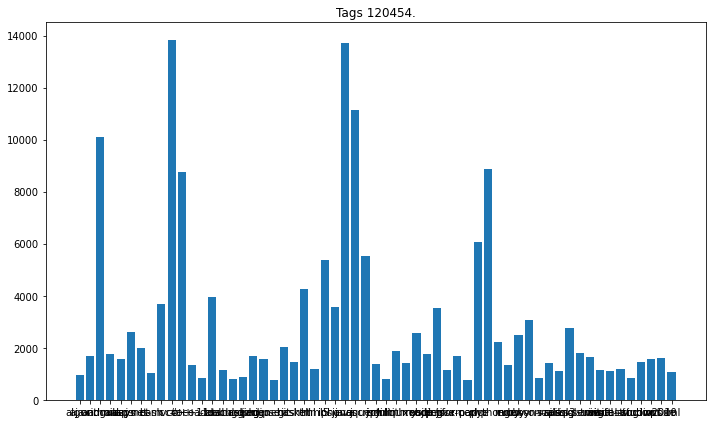

In [ ]:
f = lambda x: df[x].sum()
tags = df.columns[2:len(df.columns) - 1]
tags_counts = [f(x) for x in tags]
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
plt.bar(tags, tags_counts)
ax.set_title(f"Tags {len(df)}.")
plt.tight_layout();

The next cell takes about 1 minute to run

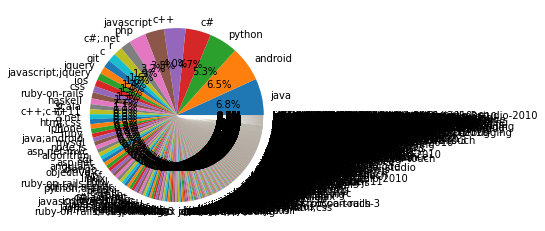

In [ ]:
df["Labels"].value_counts().plot( kind='pie', autopct='%1.1f%%')

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2)

The next code cell takes 5 minutes to run

In [ ]:
dls_blk = DataBlock(blocks = (TextBlock.from_df(text_cols = "Text", seq_len = 128),
                              MultiCategoryBlock),
                    get_x = ColReader(cols = "text"),
                    get_y = ColReader(cols = "Labels", label_delim = ";"),
                    splitter = TrainTestSplitter(test_size = 0.2, random_state = 21))

dls_clf = dls_blk.dataloaders(train_df,
                              bs = 64,
                              seed = 20)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
learn_clf = text_classifier_learner(dls_clf,AWD_LSTM,drop_mult=0.5,metrics = accuracy_multi).to_fp16()

The next code cell takes 1 minute to run

SuggestedLRs(lr_min=0.07585775852203369, lr_steep=0.05754399299621582)

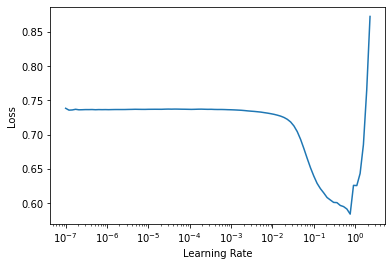

In [ ]:
learn_clf.lr_find()

The next code cell takes 2 minutes to run

In [ ]:
learn_clf.fit_one_cycle(1,7e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.097493,0.093648,0.975871,02:24


In [ ]:
learn_clf.freeze_to(-2)
learn_clf.fit_one_cycle(1,slice(1e-2/(2.6**4),5e-2))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.088584,0.082471,0.978464,02:32


In [ ]:
learn_clf.freeze_to(-3)
learn_clf.fit_one_cycle(1,slice(5e-3/(2.6**4),5e-2))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.077087,0.313656,0.979490,02:41


In [ ]:
learn_clf.unfreeze()
learn_clf.fit_one_cycle(1,slice(1e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.072032,0.454681,0.979314,02:57


In [ ]:
learn_clf.export("stackoverflow_multilabel_model.pkl")

In [ ]:
cols = list(df)
labels = cols[1:len(cols)-1]
labels

['.net',
 'ajax',
 'algorithm',
 'android',
 'angularjs',
 'arrays',
 'asp.net',
 'asp.net-mvc',
 'bash',
 'c',
 'c#',
 'c++',
 'c++11',
 'cocoa-touch',
 'css',
 'database',
 'debugging',
 'delphi',
 'django',
 'eclipse',
 'generics',
 'git',
 'haskell',
 'html',
 'html5',
 'ios',
 'iphone',
 'java',
 'javascript',
 'jquery',
 'json',
 'linq',
 'linux',
 'multithreading',
 'mysql',
 'node.js',
 'objective-c',
 'osx',
 'performance',
 'perl',
 'php',
 'python',
 'r',
 'regex',
 'ruby',
 'ruby-on-rails',
 'ruby-on-rails-3',
 'scala',
 'spring',
 'sql',
 'sql-server',
 'string',
 'swift',
 'unit-testing',
 'visual-studio',
 'visual-studio-2010',
 'windows',
 'wpf',
 'xcode',
 'xml']

In [ ]:
t = "i develop database sql with java application"
p = learn_clf.predict(t.lower())
preds_df = pd.concat([pd.DataFrame(labels),pd.DataFrame(p[2])],axis=1)
preds_df.columns = ["Label", "Prob"]
preds_df = preds_df.sort_values('Prob',ascending=False)
preds_df

,Label,Prob
27,java,0.977799
49,sql,0.418459
15,database,0.310799
34,mysql,0.236869
50,sql-server,0.218669
47,scala,0.062904
20,generics,0.029873
38,performance,0.021451
3,android,0.020964
10,c#,0.018476
